In [1]:
from pymatgen.io.cif import CifParser
from pymatgen.ext.matproj import MPRester
from urllib.request import urlopen
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("key.txt") as f:
    key = f.read()
m = MPRester(key)

C:\AI\miniforge\envs\spyder\Lib\site-packages\pymatgen\ext\matproj_legacy.py:164: UserWarning: You are using the legacy MPRester. This version of the MPRester will no longer be updated. To access the latest data with the new MPRester, obtain a new API key from https://materialsproject.org/api and consult the docs at https://docs.materialsproject.org/ for more information.
  warnings.warn(


In [3]:
results = m.query({'formula_anonymous':'ABC3'}, properties = ['cif','band_gap', 'phonon', 'e_above_hull', 'elasticity'])

100%|█████████████████████████████████████████████████████████████████████████████| 4358/4358 [00:06<00:00, 654.13it/s]


In [4]:
mean_atomic_numbers = []
max_atomic_numbers = []
min_atomic_numbers = []
std_atomic_numbers = []

a_parameters = []
b_parameters = []
c_parameters = []

alpha_parameters = []
beta_parameters = []
gamma_parameters = []

min_distance_matrix = []
max_distance_matrix = []
mean_distance_matrix = []
std_distance_matrix = []

band_gaps = []
phonon = []
e_above_hull = []
elasticity = []

In [5]:
for r in results:
    cif  = r['cif']
    bg = r['band_gap']
    phon = r['phonon']
    e_hull = r['e_above_hull']
    ela = r['elasticity']
    if bg >= 1 and bg <= 1.8:
        parser = CifParser.from_string(cif)
        structure = parser.get_structures()
        structure = structure[0]
        mean_atomic_numbers += [np.mean(structure.atomic_numbers)]
        max_atomic_numbers += [np.max(structure.atomic_numbers)]
        min_atomic_numbers += [np.min(structure.atomic_numbers)]
        std_atomic_numbers += [np.min(structure.atomic_numbers)]
        a_parameters += [structure.lattice.abc[0]]
        b_parameters += [structure.lattice.abc[1]]
        c_parameters += [structure.lattice.abc[2]]
        alpha_parameters += [structure.lattice.angles[0]]
        beta_parameters += [structure.lattice.angles[1]]
        gamma_parameters += [structure.lattice.angles[2]]
        mean_distance_matrix += [np.mean(structure.distance_matrix)]
        max_distance_matrix += [np.max(structure.distance_matrix)]
        min_distance_matrix += [np.min(structure.distance_matrix)]
        std_distance_matrix += [np.std(structure.distance_matrix)]
        
        band_gaps += [bg]

C:\Users\Kshitij Vashisth\AppData\Local\Temp\ipykernel_7068\3482876994.py:8: DeprecationWarning: `from_string` is deprecated!
Use from_str instead
  parser = CifParser.from_string(cif)
C:\AI\anaconda\lib\site-packages\pymatgen\io\cif.py:1168: UserWarning: Issues encountered while parsing CIF: Some fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


In [25]:
cif

"# generated using pymatgen\ndata_AlBiO3\n_symmetry_space_group_name_H-M   'P 1'\n_cell_length_a   5.38486300\n_cell_length_b   5.39596500\n_cell_length_c   9.42456800\n_cell_angle_alpha   90.00000000\n_cell_angle_beta   90.00000000\n_cell_angle_gamma   90.00000000\n_symmetry_Int_Tables_number   1\n_chemical_formula_structural   AlBiO3\n_chemical_formula_sum   'Al4 Bi4 O12'\n_cell_volume   273.84526430\n_cell_formula_units_Z   4\nloop_\n _symmetry_equiv_pos_site_id\n _symmetry_equiv_pos_as_xyz\n  1  'x, y, z'\nloop_\n _atom_site_type_symbol\n _atom_site_label\n _atom_site_symmetry_multiplicity\n _atom_site_fract_x\n _atom_site_fract_y\n _atom_site_fract_z\n _atom_site_occupancy\n  Al  Al0  1  0.95829300  0.03055200  0.25000000  1\n  Al  Al1  1  0.45829300  0.46944800  0.75000000  1\n  Al  Al2  1  0.54170700  0.53055200  0.25000000  1\n  Al  Al3  1  0.04170700  0.96944800  0.75000000  1\n  Bi  Bi4  1  0.00000000  0.50000000  0.00000000  1\n  Bi  Bi5  1  0.50000000  0.00000000  0.0000000

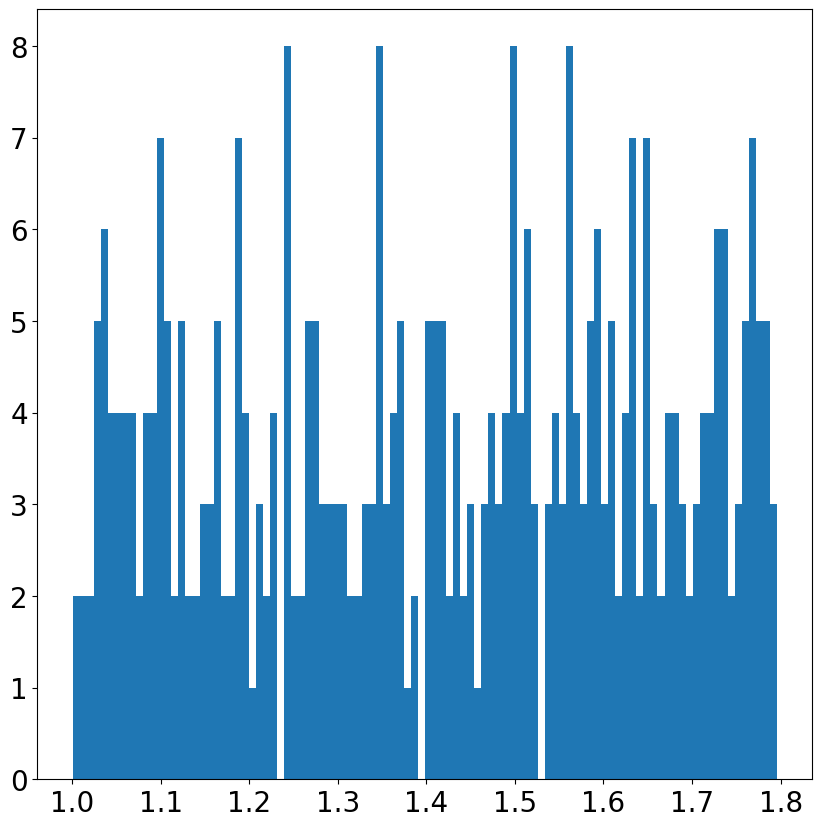

In [7]:
plt.rcParams.update({'font.size':20})

plt.figure(figsize = (10,10))
plt.hist(band_gaps, bins = 100)
plt.savefig('Histogram_PDF', bbox_inches = 'tight')

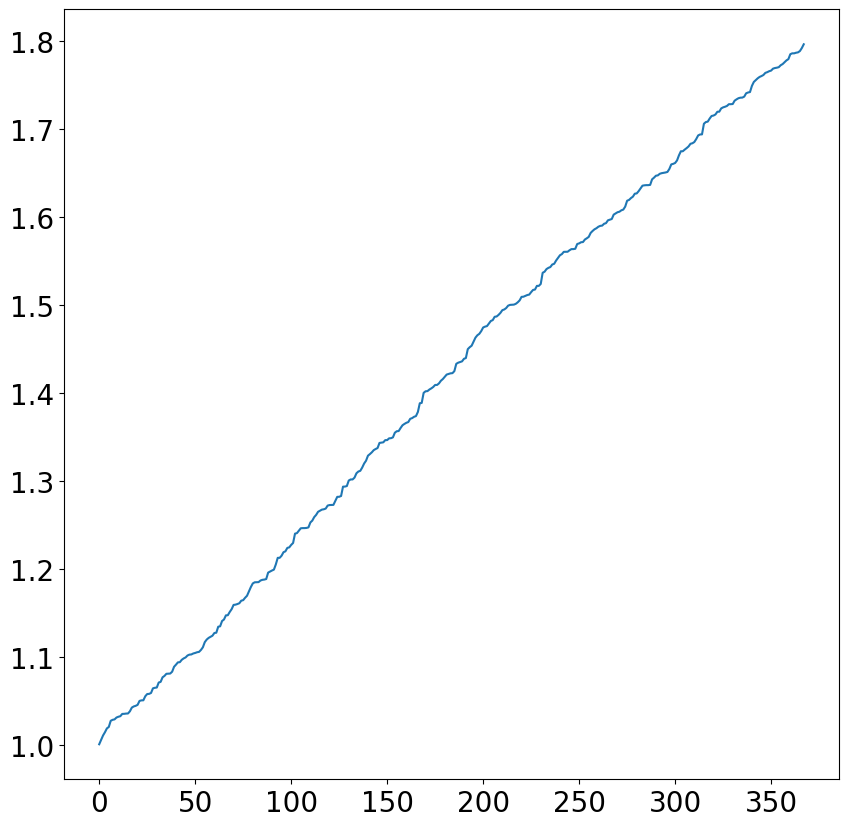

In [8]:
band_gaps_sorted = sorted(band_gaps)

plt.figure(figsize = (10,10))
plt.plot(band_gaps_sorted)
plt.xlabel('')
plt.ylabel('')
plt.savefig('Scatterplot', bbox_inches = 'tight')

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [10]:
dataset_df = pd.DataFrame({"mean_atomic_numbers":mean_atomic_numbers,
                           "max_atomic_numbers":max_atomic_numbers,
                           "min_atomic_numbers":min_atomic_numbers,
                           "std_atomic_numbers":std_atomic_numbers,
                           "a_parameters":a_parameters,
                           "b_parameters":b_parameters,
                           "c_parameters":c_parameters,
                           "alpha_parameters":alpha_parameters,
                           "beta_parameters":beta_parameters,
                           "gamma_parameters":gamma_parameters,
                           "mean_distance_matrix":mean_distance_matrix,
                           "max_distance_matrix":max_distance_matrix,
                           "min_distance_matrix":min_distance_matrix,
                           "std_distance_matrix":std_distance_matrix
                          })

In [11]:
scaler = StandardScaler().fit(dataset_df)
scaled_dataset_df = scaler.transform(dataset_df)

In [12]:
dataset_df.head()

,mean_atomic_numbers,max_atomic_numbers,min_atomic_numbers,std_atomic_numbers,a_parameters,b_parameters,c_parameters,alpha_parameters,beta_parameters,gamma_parameters,mean_distance_matrix,max_distance_matrix,min_distance_matrix,std_distance_matrix
0,23.6,50,16,16,8.801906,8.841259,25.197478,89.677061,89.351224,60.147130,7.363342,13.552259,0.0,3.193910
1,17.2,51,8,8,3.806442,4.137640,5.318809,112.889990,110.966891,90.000000,1.955154,2.905439,0.0,1.047292
2,18.4,29,15,15,5.314222,5.314222,15.176657,90.000000,90.000000,90.000000,4.522313,8.467775,0.0,2.062373
3,16.2,32,8,8,5.348448,6.893813,6.893807,86.199724,81.329260,81.329228,3.029410,5.194666,0.0,1.005739
4,12.0,23,8,8,4.961005,4.961074,5.382130,62.556976,89.999498,60.003272,2.137026,3.642610,0.0,0.831265


In [13]:
from sklearn.model_selection import train_test_split

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(scaled_dataset_df, band_gaps, test_size = .2, random_state=None)

In [14]:
# !pip install xgboost

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

0.05208679823475778
-0.003545224833682914


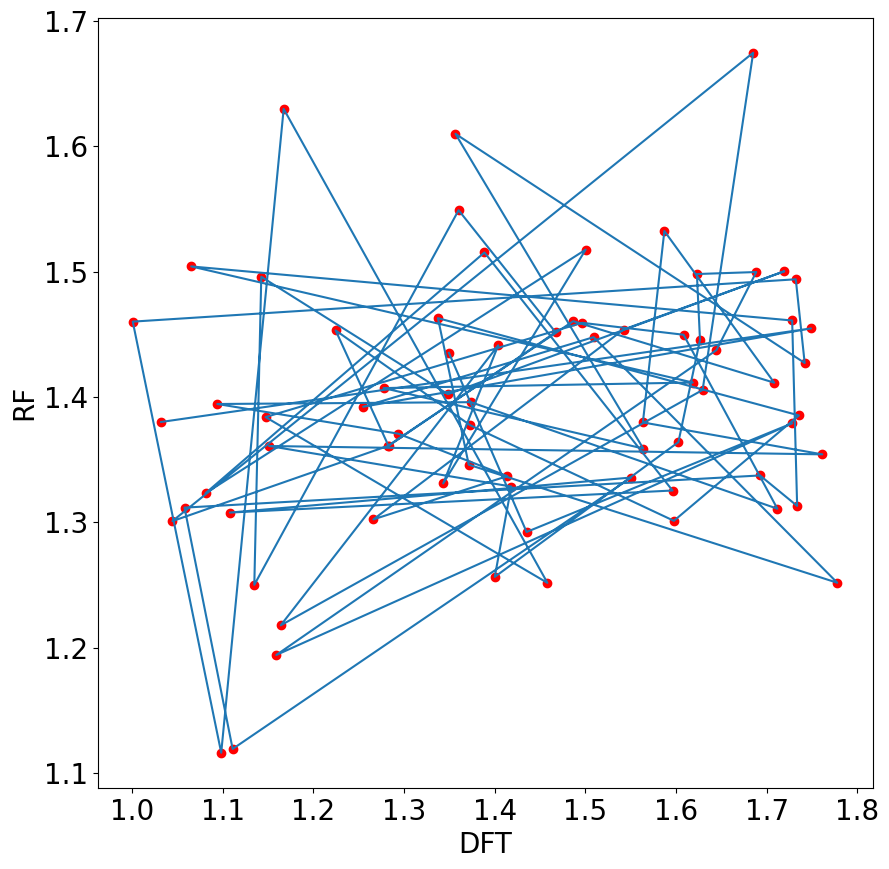

In [16]:
regr  = RandomForestRegressor (n_estimators = 400, max_depth=400, random_state = 0)
regr.fit(X_train_scaled, y_train)
y_predicted = regr.predict(X_test_scaled)
print(mean_squared_error(y_test, y_predicted))
print(r2_score(y_test, y_predicted))

xPlot = y_test
yPlot = y_predicted
plt.figure(figsize=(10,10))
plt.plot(xPlot, yPlot, 'ro')
plt.plot(xPlot, yPlot)
plt.ylabel('RF')
plt.xlabel('DFT')
plt.savefig('RF_Correlation_Test', bbox_inches='tight')

C:\AI\anaconda\lib\site-packages\xgboost\core.py:160: UserWarning: [13:14:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBOOST MSE	0.052102520949388366

XGBOOST R2	-0.0038481510208105973



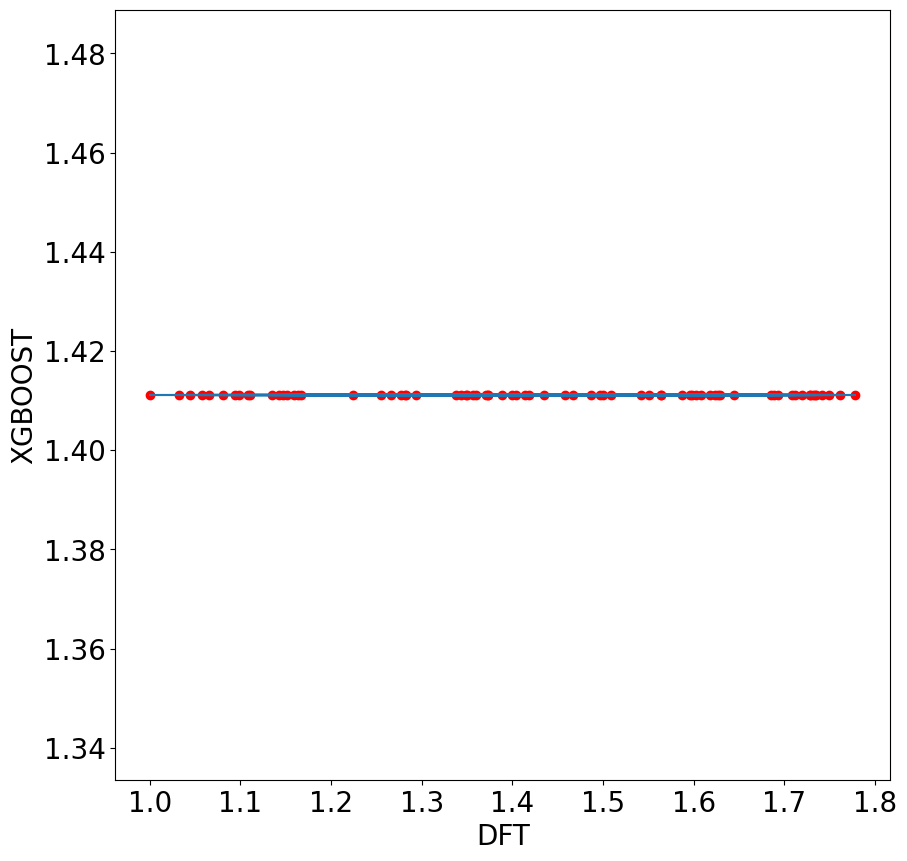

In [17]:
regr1 = XGBRegressor(objective = 'reg:linear', colsample_bytree = 0.3, learning_rate=0.1, max_depth=400,alpha=10, n_estimators=400)
regr1.fit(X_train_scaled, y_train)
y_predicted = regr1.predict(X_test_scaled)

print('XGBOOST MSE\t'+str(mean_squared_error(y_test, y_predicted))+'\n')
print('XGBOOST R2\t'+str(r2_score(y_test, y_predicted))+'\n')

xPlot=y_test
yPlot=y_predicted
plt.figure(figsize=(10,10))
plt.plot(xPlot, yPlot, 'ro')
plt.plot(xPlot, yPlot)
plt.ylabel('XGBOOST')
plt.xlabel('DFT')
plt.savefig('XGBOOST_Correlation_Test', bbox_inches='tight')